# Vehicle Theft Analysis

## Connecting to the database

In [1]:
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Float, Boolean
from sqlalchemy.ext.automap import automap_base

import pandas as pd

In [2]:
from mysql_connect import get_connection_string

# Create the engine
engine = create_engine(get_connection_string())
Base = automap_base()

In [3]:
# Collect all tables
inspector = inspect(engine)
inspector.get_table_names()

['locations', 'make_details', 'stolen_vehicles']

In [4]:
# Start session
session = Session(bind=engine)

# Reflect all tables in the database
Base.prepare(engine, reflect=True)
locations = Base.classes.locations
make_details  = Base.classes.make_details
stolen_vehicles  = Base.classes.stolen_vehicles

In [7]:
# Example SQL query
sql_query = '''
    SELECT * 
    FROM stolen_vehicles
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,2021-11-05,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,2021-12-13,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2022-02-13,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,2021-11-13,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,2022-01-10,102
...,...,...,...,...,...,...,...,...
4548,4549,None,NaN,NaN,None,None,2022-02-18,102
4549,4550,None,NaN,NaN,None,None,2022-02-14,109
4550,4551,None,NaN,NaN,None,None,2022-03-09,102
4551,4552,None,NaN,NaN,None,None,2022-03-07,109


## Objective 1: Identify when vehicles are likely to be stolen

### Number of vehicles stolen each year

In [26]:
# SQL query
sql_query = '''
    SELECT YEAR(date_stolen) AS year, COUNT(vehicle_id) AS stolen_vehicles
    FROM stolen_vehicles
    GROUP BY year
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,year,stolen_vehicles
0,2021,1668
1,2022,2885


### Number of vehicles stolen each month

In [27]:
# SQL query
sql_query = '''
    SELECT YEAR(date_stolen) AS year, MONTH(date_stolen) AS month, COUNT(vehicle_id) AS stolen_vehicles
    FROM stolen_vehicles
    GROUP BY year, month
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,year,month,stolen_vehicles
0,2021,11,560
1,2021,12,644
2,2022,2,763
3,2022,1,740
4,2021,10,464
5,2022,3,1053
6,2022,4,329


### Number of vehicles stolen each day of the week
Display the day of the week as Monday, Tuesday, etc.

In [38]:
# SQL query
sql_query = '''
    SELECT WEEKDAY(date_stolen) AS weekday, DAYNAME(date_stolen) AS day, COUNT(vehicle_id) AS stolen_vehicles
    FROM stolen_vehicles
    GROUP BY weekday, day
'''

# Read SQL query into a DataFrame
weekday_thefts = pd.read_sql(sql_query, engine).sort_values('weekday', ascending=True)
weekday_thefts

,weekday,day,stolen_vehicles
1,0,Monday,767
4,1,Tuesday,711
6,2,Wednesday,629
5,3,Thursday,619
0,4,Friday,655
3,5,Saturday,577
2,6,Sunday,595


<Axes: xlabel='day'>

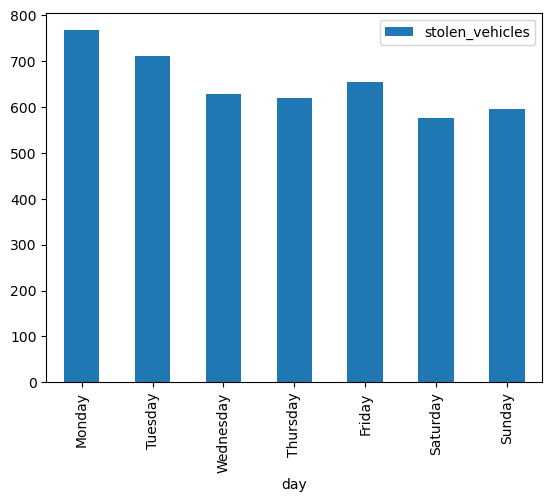

In [40]:
# Bar chart
weekday_thefts.plot.bar(x='day', y='stolen_vehicles')

## Objective 2: Identify which vehicles are likely to be stolen

### Vehicle types that are most often and least often stolen

In [55]:
# SQL query
sql_query = '''
    SELECT vehicle_type AS most_stolen_type, COUNT(1) AS number_stolen
    FROM stolen_vehicles
    GROUP BY vehicle_type
    ORDER BY number_stolen DESC
    LIMIT 1
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,most_stolen_type,number_stolen
0,Stationwagon,945


In [56]:
# SQL query
sql_query = '''
    SELECT vehicle_type AS least_stolen_type, COUNT(1) AS number_stolen
    FROM stolen_vehicles
    GROUP BY vehicle_type
    ORDER BY number_stolen ASC
    LIMIT 1
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,least_stolen_type,number_stolen
0,Special Purpose Vehicle,1


### Find the average age of the cars that are stolen for each vehicle type

In [60]:
# Total number of stolen vehicle

# SQL query
sql_query = '''
    SELECT COUNT(vehicle_id) AS total
    FROM stolen_vehicles
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,total
0,4553


In [63]:
# SQL query
sql_query = '''
    SELECT
        vehicle_type,
        COUNT(1) AS number_stolen
    FROM stolen_vehicles
    GROUP BY vehicle_type
    ORDER BY number_stolen DESC
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,vehicle_type,number_stolen
0,Stationwagon,945
1,Saloon,851
2,Hatchback,644
3,Trailer,582
4,Utility,466
5,Roadbike,297
6,Moped,187
7,Light Van,154
8,Boat Trailer,105
9,Trailer - Heavy,90


In [48]:
# SQL query
sql_query = '''
    SELECT *
    FROM stolen_vehicles
    LIMIT 1
'''

# Read SQL query into a DataFrame
pd.read_sql(sql_query, engine)

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623,2021,BST2021D,Silver,2021-11-05,102


## Close session

In [ ]:
# Close Session
session.close()